In [1]:
import pandas as pd

In [2]:
all_AVA_muts = pd.read_pickle("./data/4_10_with_uniq_midpts.pkl")
print(len(all_AVA_muts))
all_AVA_muts.head()

3921


,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [3]:
all_AVA_muts.exp.unique()

array(['42C', 'C13', 'EG_pCA24N-fucO', 'GLU', 'GYD', 'ILT_MG1655',
       'Iron-ALE', 'JCL260__isobutanol_production_host-M9-MG1655gbk',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-2-deoxyribose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-arabinose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-lyxose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-m-tartrate2',
       'MG1655-M9-NC_000913_3gb-stationary-37-monomethyl_succinate2',
       'MG1655-blaTEM1_ceftazidime', 'MG1655-blaTEM1_untreated',
       'MG1655-pBGT_ceftazidime', 'MG1655-pBGT_untreated',
       'MG1655_ceftazidime', 'MG1655_chloramphenicol',
       'MG1655_doxycycline', 'MG1655_trimethoprim', 'MG1655_untreated',
       'OxidizeME_PQ3', 'PGI', 'SER', 'SSW_AC', 'SSW_GLU_AC',
       'SSW_GLU_GLY', 'SSW_GLU_XYL', 'SSW_GLY', 'SSW_XYL',
       'TOL_2,3-butanediol', 'TOL_adipic_acid', 'TOL_coumaric_acid',
       'TOL_glutaric_acid', 'TOL_hexamethylenediamine',
       'TOL_hexanoic_acid', 'TOL_isobutyric_acid', '

In [4]:
# rename values for 2 different data structures/sources
rename_d = {
    '2 3-butanediol': 'butanediol',
    'TOL_2,3-butanediol': 'butanediol',
    'adipic acid': 'adipate',
    'TOL_adipic_acid': 'adipate',
    'coumaric acid': 'coumarate',
    'TOL_coumaric_acid': 'coumarate',
    'glutaric acid': 'glutarate',
    'TOL_glutaric_acid': 'glutarate',
    'hexamethylenediamine': 'diaminohexane',
    'TOL_hexamethylenediamine': 'diaminohexane',
    'hexanoic acid': 'hexanoate',
    'TOL_hexanoic_acid': 'hexanoate',
    'isobutyric acid': 'isobutyrate',
    'TOL_isobutyric_acid': 'isobutyrate',
    'n-butanol': 'butanol',
    'TOL_n-butanol': 'butanol',
    'octanoic acid': 'octanoate',
    'TOL_octanoic_acid': 'octanoate',
    # 'propanediol'
    # 'TOL_propanediol'
    'putrescine': 'diaminobutane',
    'TOL_putrescine': 'diaminobutane'
}


In [5]:
# TOL_EXP_L = ['TOL_2,3-butanediol', 'TOL_adipic_acid', 'TOL_coumaric_acid',
#        'TOL_glutaric_acid', 'TOL_hexamethylenediamine',
#        'TOL_hexanoic_acid', 'TOL_isobutyric_acid', 'TOL_n-butanol',
#        'TOL_octanoic_acid', 'TOL_propanediol', 'TOL_putrescine']

tol_mut_df = all_AVA_muts[all_AVA_muts["exp"].isin(rename_d.keys())].copy()
tol_mut_df["exp"] = tol_mut_df["exp"].map(rename_d)
tol_mut_df["supplement"] = tol_mut_df["supplement"].map(rename_d)
tol_mut_df

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
1414,7070,butanediol,1,50,1,1,1.0,998193,MOB,IS5 (+) +4 bp,...,37 celsius,glucose(2),butanediol,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1415,7071,butanediol,1,50,1,1,1.0,1347480,MOB,IS5 (+) +4 bp,...,37 celsius,glucose(2),butanediol,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1416,7067,butanediol,1,50,1,1,1.0,1931977,SNP,T→G,...,37 celsius,glucose(2),butanediol,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1417,7072,butanediol,1,50,1,1,1.0,2794550,SNP,T→G,...,37 celsius,glucose(2),butanediol,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1418,7068,butanediol,1,50,1,1,1.0,2911491,DEL,"Δ7,528 bp",...,37 celsius,glucose(2),butanediol,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2778,diaminobutane,7,50,1,1,1.0,3318960,SNP,C→A,...,37 celsius,glucose(2),diaminobutane,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2062,2779,diaminobutane,7,50,1,1,1.0,3400195,SNP,G→A,...,37 celsius,glucose(2),diaminobutane,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2063,2776,diaminobutane,7,50,1,1,1.0,3473612,SNP,A→C,...,37 celsius,glucose(2),diaminobutane,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2064,2774,diaminobutane,7,50,1,1,1.0,3815808,DEL,(A)8→7,...,37 celsius,glucose(2),diaminobutane,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [6]:
supp_exp_ale_cnt_d = dict()
for exp, exp_mut_df in tol_mut_df.groupby(["supplement"]):
    supp_exp_ale_cnt_d[exp] = len(exp_mut_df["exp ALE"].unique())
supp_exp_ale_cnt_d

{'adipate': 7,
 'butanediol': 7,
 'butanol': 8,
 'coumarate': 8,
 'diaminobutane': 7,
 'diaminohexane': 6,
 'glutarate': 7,
 'hexanoate': 7,
 'isobutyrate': 8,
 'octanoate': 6}

In [7]:
tol_chem_geno_feat_df = pd.read_pickle('./tol_chem_geno_feat_df.pkl')
tol_chem_geno_feat_df['chemical'] = tol_chem_geno_feat_df['chemical'].map(rename_d)
tol_chem_geno_feat_df.head()

,chemical,geno feat,ALE-unique mutation count,association to chemical (log-odds),exp ALE count,ALE experiment convergence
0,butanediol,elfA,1,4.008393,1,0.142857
1,butanediol,rnb,2,3.034123,2,0.285714
2,butanediol,purT,6,3.873811,5,0.714286
3,butanediol,gabP,1,0.000000,1,0.142857
4,butanediol,relA-mazEF TFBS,5,4.036656,5,0.714286


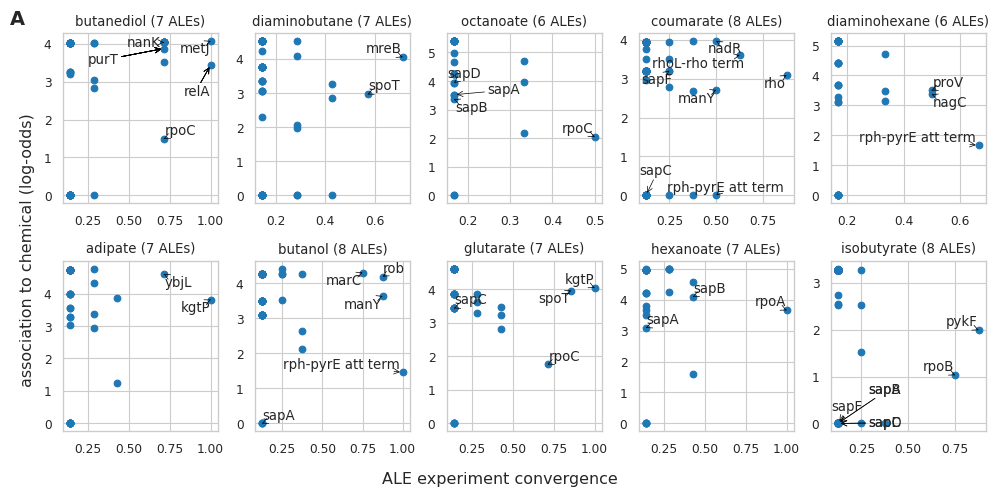

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("whitegrid")


fig, axs = plt.subplots(
    2,5,
    figsize=(10,5),
    sharex=False, sharey=False
)


conds = list(set(rename_d.values()))
axs = axs.ravel()

x_col = "ALE experiment convergence"
y_col = "association to chemical (log-odds)"
FEATURES_TO_SKIP = {# for removing features to poorly cluster in the figures and are uninteresting
    "relAp1","relAp2","relAp3","relAp4","barA","gudD","rlmD","rlmDp","relA-mazEF TFBS","relA-mazEF relA-mazEF TFBS"  # assuming the ultimate mutation target is relA
}
OP_FEATS_TO_INCLUDE = {
    'sapA','sapB','sapC','sapD','sapF'
}
for k, ax in enumerate(axs):
    if k < len(conds):
        chem_data = tol_chem_geno_feat_df[tol_chem_geno_feat_df["chemical"]==conds[k]]
        xs = chem_data[x_col]
        ys = chem_data[y_col]
        ax.scatter(
            x=xs,
            y=ys
        )
        ax.set_title(conds[k] + " (" + str(supp_exp_ale_cnt_d[conds[k]]) + " ALEs)")

        texts = []
        for _, m in chem_data.iterrows():
            if (m[x_col]) >= 0.5:
                if conds[k] == "butanediol":
                    if m["geno feat"] not in FEATURES_TO_SKIP:
                        t = ax.text(m[x_col], m[y_col], str(m["geno feat"]))
                else:
                    t = ax.text(m[x_col], m[y_col], str(m["geno feat"]))
                texts.append(t)
            else:
                if m["geno feat"] in OP_FEATS_TO_INCLUDE:
                    t = ax.text(m[x_col], m[y_col], str(m["geno feat"]))
                    texts.append(t)
        adjust_text(
            texts,
            ax=ax,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            # force_points=((0.1, 0.1)),
            force_text=((0.1, 0.1))
        )
        
fig.supxlabel(x_col, y=0.025)
fig.supylabel(y_col)
fig.text(0.01, 0.95, 'A', weight='bold', fontsize=14)

fig.tight_layout()

plt.savefig("f1a.svg")